## ***MARINE DEBRIS DETECTION***

problem statement:
                  

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import joblib

Loading a **dataset**

In [2]:
Data_Frame=pd.read_excel('ENV_Marine_Pollution_Obs_data_v4.xlsx')

In [3]:
Data_Frame.head()

,OBJECTID,Join_Count,TARGET_FID,obs_trip_no,pollution_report_no,pollution_event_no,obs_form_vers,inc_date,inc_time,inc_dtime,...,Note8,Note9,Note10,Note11,LAT_1,LONG,EEZ_Local,Country,ISO_3digit,PACIOCEA
0,1,1,1,12517,1802,338,2007,40212,500,40212.208333,...,NaN,NaN,NaN,NaN,-0.426850,146.4896,EEZ,Papua New Guinea,PNG,1
1,2,1,2,12520,1803,339,2007,20/04/2010 0:00,2300,20/04/2010 23:00,...,NaN,NaN,NaN,NaN,-1.658100,152.6769,EEZ,Papua New Guinea,PNG,1
2,3,1,3,12521,1805,341,2007,27/05/2010 0:00,1242,27/05/2010 12:42,...,NaN,NaN,NaN,NaN,9.369533,143.4865,EEZ,Micronesia,FSM,1
3,4,1,4,12521,1806,342,2007,27/05/2010 0:00,1242,27/05/2010 12:42,...,NaN,NaN,NaN,NaN,9.369533,143.4865,EEZ,Micronesia,FSM,1
4,5,1,5,12521,1807,343,2007,40184,1306,40184.545833,...,NaN,NaN,NaN,NaN,4.837083,143.7593,EEZ,Micronesia,FSM,1


In [4]:
Data_Frame.shape

(8133, 42)

In [5]:
Data_Frame.size

341586

In [6]:
Data_Frame.columns

Index(['OBJECTID', 'Join_Count', 'TARGET_FID', 'obs_trip_no',
       'pollution_report_no', 'pollution_event_no', 'obs_form_vers',
       'inc_date', 'inc_time', 'inc_dtime', 'eez_code', 'port_id', 'activ_id',
       'vatyp_id', 'stickers_ans', 'aware_ans', 'advised_ans',
       'location_other', 'eez_subcode', 'pollutiontype_id', 'pollution_type',
       'material_id', 'material', 'pollution_desc', 'pollution_qty', 'Note1',
       'Note2', 'Note3', 'Note4', 'Note5', 'Note6', 'Note7', 'Note8', 'Note9',
       'Note10', 'Note11', 'LAT_1', 'LONG', 'EEZ_Local', 'Country',
       'ISO_3digit', 'PACIOCEA'],
      dtype='object')

In [7]:
Data_Frame.info

<bound method DataFrame.info of       OBJECTID  Join_Count  TARGET_FID  obs_trip_no  pollution_report_no  \
0            1           1           1        12517                 1802   
1            2           1           2        12520                 1803   
2            3           1           3        12521                 1805   
3            4           1           4        12521                 1806   
4            5           1           5        12521                 1807   
...        ...         ...         ...          ...                  ...   
8128      8129           1        8130        34190                10053   
8129      8130           1        8131        34190                10054   
8130      8131           1        8132        34190                10055   
8131      8132           1        8133        34190                10056   
8132      8133           1        8134        34190                10057   

      pollution_event_no  obs_form_vers         inc_dat

In [8]:
Data_Frame.describe()

,OBJECTID,Join_Count,TARGET_FID,obs_trip_no,pollution_report_no,pollution_event_no,obs_form_vers,inc_time,port_id,activ_id,vatyp_id,pollutiontype_id,material_id,LAT_1,LONG,PACIOCEA
count,8133.000000,8133.000000,8133.00000,8133.000000,8133.000000,8133.000000,8133.000000,8133.000000,1586.000000,7685.000000,7184.000000,8133.000000,8133.000000,8133.000000,8133.000000,8133.000000
mean,4067.000000,0.959916,4067.70048,22260.362105,5673.929546,5345.146563,2006.509652,1216.785319,172.520807,7.765257,4.839087,74.233493,66.003566,-1.847270,145.882422,0.958687
std,2347.939203,0.196167,2348.30264,7228.272320,2596.456313,3108.345534,2.378077,957.570671,67.951875,14.373388,5.648751,21.678824,23.810974,5.109457,57.633551,0.199026
min,1.000000,0.000000,1.00000,12517.000000,1802.000000,338.000000,1998.000000,0.000000,14.000000,1.000000,1.000000,0.000000,0.000000,-25.259250,-179.929400,0.000000
25%,2034.000000,1.000000,2034.00000,15493.000000,3098.000000,2548.000000,2004.000000,747.000000,119.000000,2.000000,1.000000,71.000000,60.000000,-4.083917,147.222800,1.000000
50%,4067.000000,1.000000,4068.00000,23167.000000,5500.000000,5292.000000,2007.000000,1150.000000,221.000000,5.000000,2.000000,71.000000,61.000000,-1.970900,154.066700,1.000000
75%,6100.000000,1.000000,6101.00000,28260.000000,8158.000000,8210.000000,2009.000000,1649.000000,233.000000,12.000000,6.000000,71.000000,65.000000,0.608333,164.172100,1.000000
max,8133.000000,1.000000,8134.00000,34785.000000,10057.000000,10637.000000,2009.000000,42076.000000,369.000000,118.000000,31.000000,823.000000,825.000000,37.010700,179.999400,1.000000


In [9]:
Data_Frame.isnull().sum()

OBJECTID                  0
Join_Count                0
TARGET_FID                0
obs_trip_no               0
pollution_report_no       0
pollution_event_no        0
obs_form_vers             0
inc_date                  0
inc_time                  0
inc_dtime                 0
eez_code                  0
port_id                6547
activ_id                448
vatyp_id                949
stickers_ans            168
aware_ans              2310
advised_ans            2393
location_other         6501
eez_subcode              17
pollutiontype_id          0
pollution_type            4
material_id               0
material                 42
pollution_desc         2582
pollution_qty          1163
Note1                  8093
Note2                  8108
Note3                  8115
Note4                  8120
Note5                  8125
Note6                  8127
Note7                  8128
Note8                  8129
Note9                  8131
Note10                 8132
Note11              

In [10]:
# Fill null values in numerical columns with the mean
for col in Data_Frame.select_dtypes(include=np.number).columns:
    Data_Frame[col] = Data_Frame[col].fillna(Data_Frame[col].mean())

# Fill null values in categorical columns with the mode
for col in Data_Frame.select_dtypes(include='object').columns:
    Data_Frame[col] = Data_Frame[col].fillna(Data_Frame[col].mode()[0])

# Check if there are any remaining null values
display(Data_Frame.isnull().sum())

OBJECTID               0
Join_Count             0
TARGET_FID             0
obs_trip_no            0
pollution_report_no    0
pollution_event_no     0
obs_form_vers          0
inc_date               0
inc_time               0
inc_dtime              0
eez_code               0
port_id                0
activ_id               0
vatyp_id               0
stickers_ans           0
aware_ans              0
advised_ans            0
location_other         0
eez_subcode            0
pollutiontype_id       0
pollution_type         0
material_id            0
material               0
pollution_desc         0
pollution_qty          0
Note1                  0
Note2                  0
Note3                  0
Note4                  0
Note5                  0
Note6                  0
Note7                  0
Note8                  0
Note9                  0
Note10                 0
Note11                 0
LAT_1                  0
LONG                   0
EEZ_Local              0
Country                0


# **Visualizing Class Distirbution**

C:\Users\ELCOT\AppData\Local\Temp\ipykernel_6788\1693931497.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_distribution.index, y=class_distribution.values, palette="viridis")


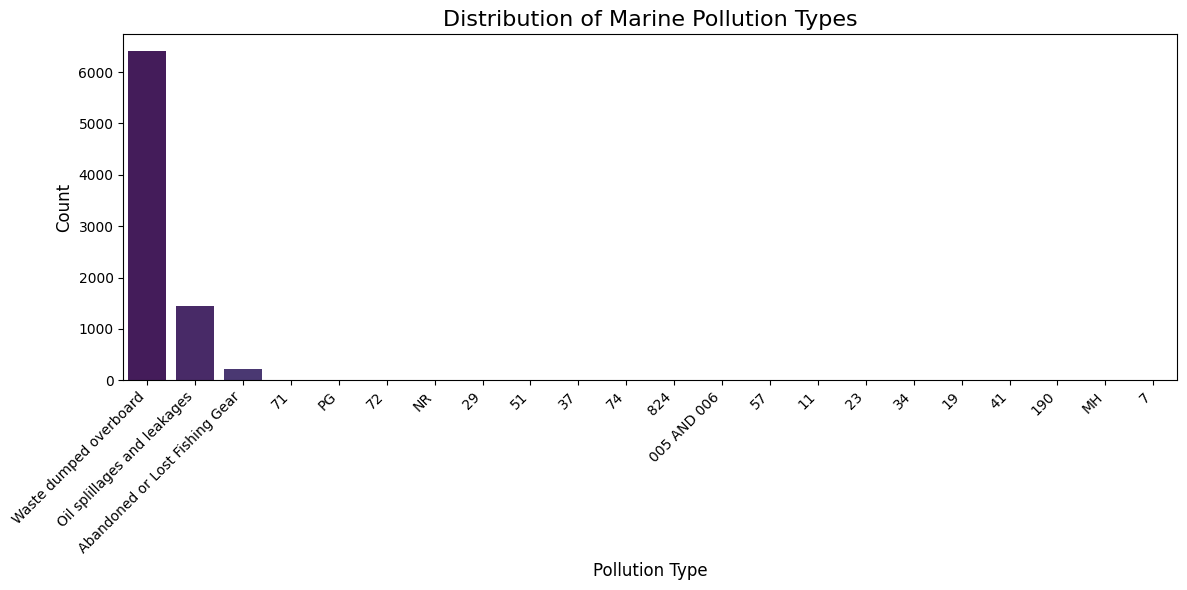

In [11]:
import seaborn as sns

class_distribution = Data_Frame['pollution_type'].value_counts().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=class_distribution.index, y=class_distribution.values, palette="viridis")
plt.title("Distribution of Marine Pollution Types", fontsize=16)
plt.xlabel("Pollution Type", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# **Applying Feature Correlation with Heatmap**

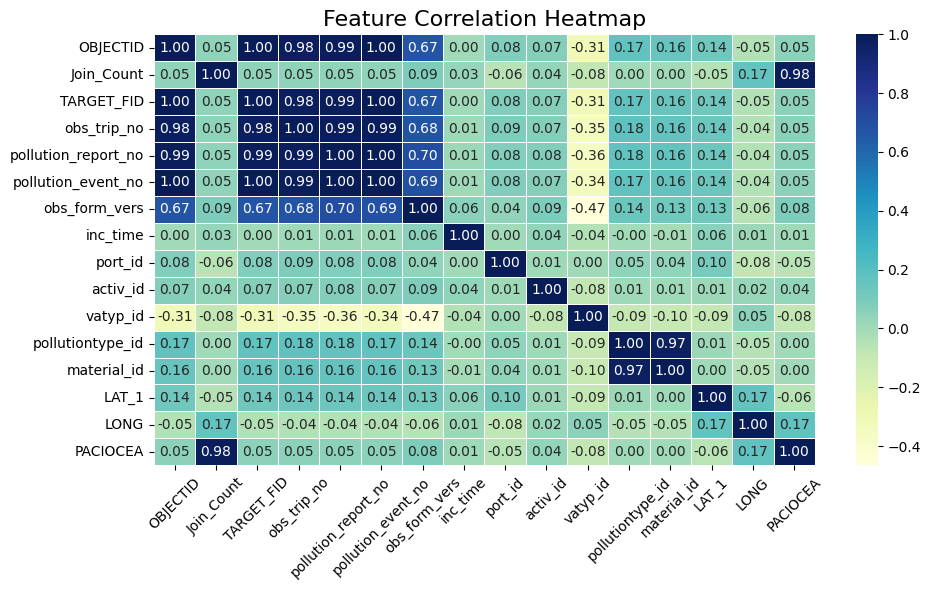

In [12]:
correlation_matrix = Data_Frame.drop(["Country"], axis=1).select_dtypes(include=['number']).corr() # excluding the target column

# Set up the matplotlib figure
plt.figure(figsize=(10, 6))

# Draw the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu", linewidths=0.5, fmt=".2f")

# Add titles and labels
plt.title("Feature Correlation Heatmap", fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# **Applying Feature Distribution with Histogram**

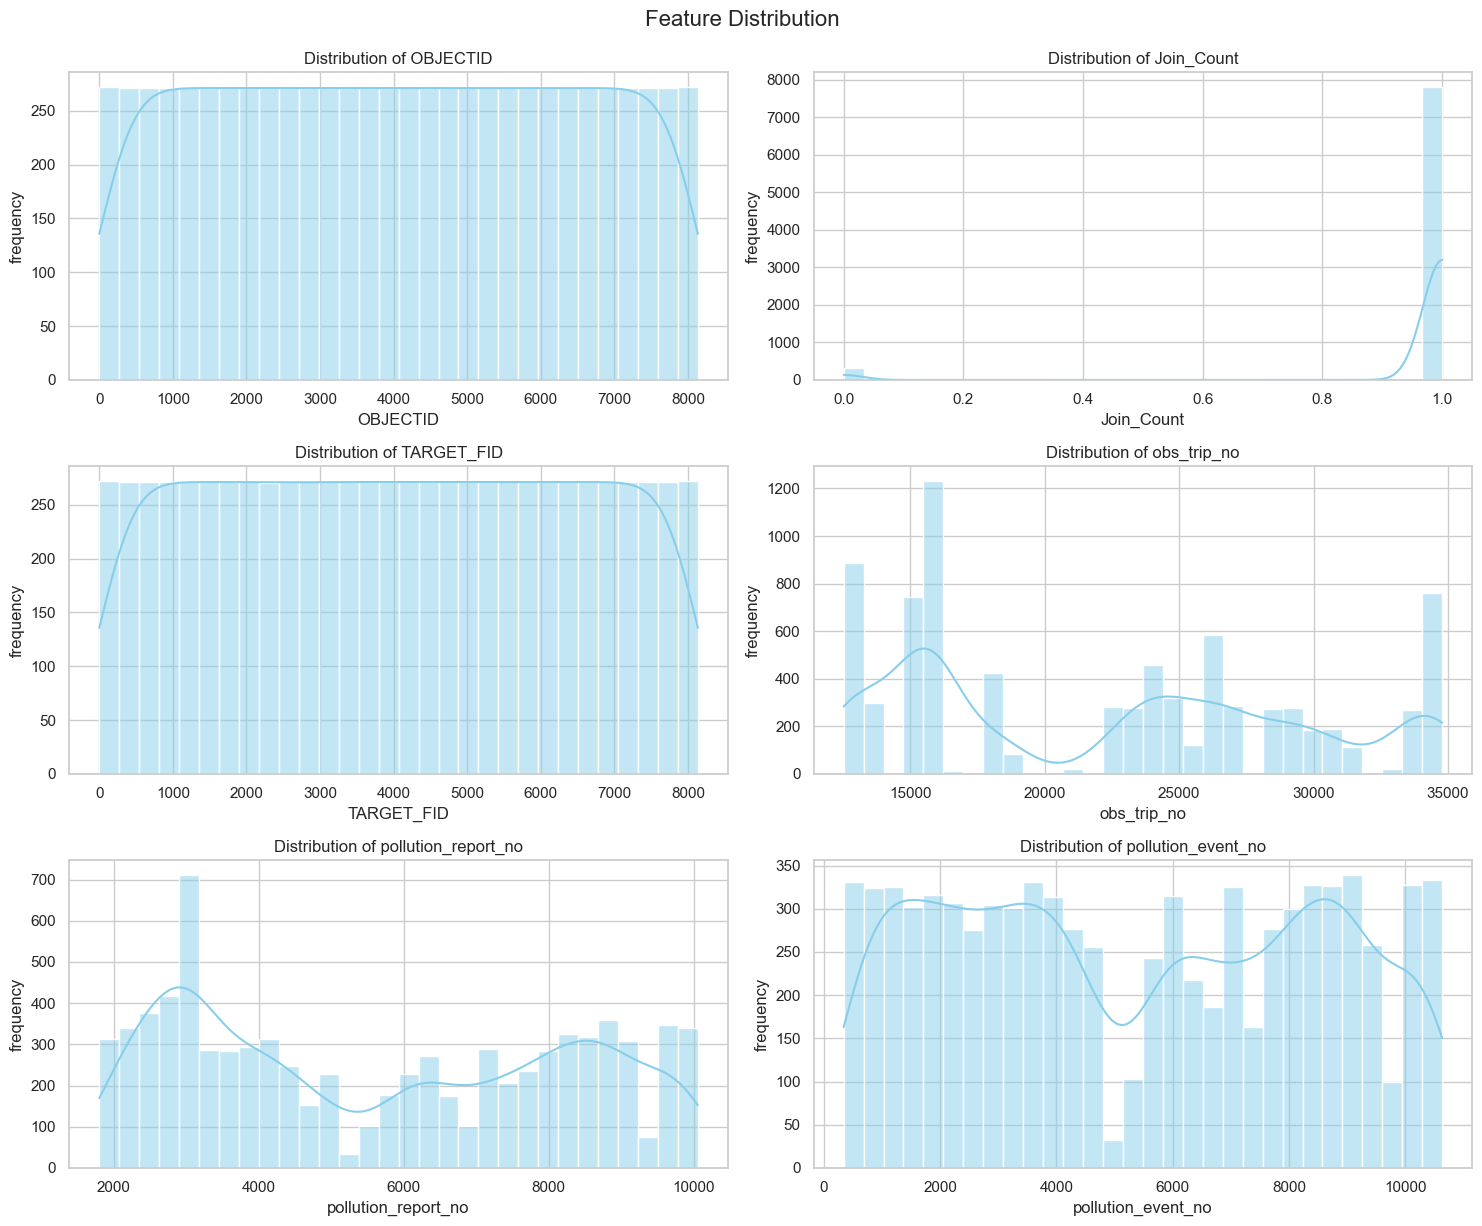

In [13]:
sns.set(style="whitegrid")
plt.figure(figsize=(15, 12))
features=['OBJECTID', 'Join_Count', 'TARGET_FID', 'obs_trip_no', 'pollution_report_no', 'pollution_event_no']
for i, feature in enumerate(features):
    plt.subplot(3, 2, i + 1)
    sns.histplot(Data_Frame[feature], bins=30, kde=True, color="skyblue")
    plt.title(f"Distribution of {feature}", fontsize=12)
    plt.xlabel(feature)
    plt.ylabel("frequency")
plt.tight_layout()
plt.suptitle("Feature Distribution", fontsize=16, y=1.02) # Added y to position the suptitle correctly
plt.show()

# **Handling Outliers**

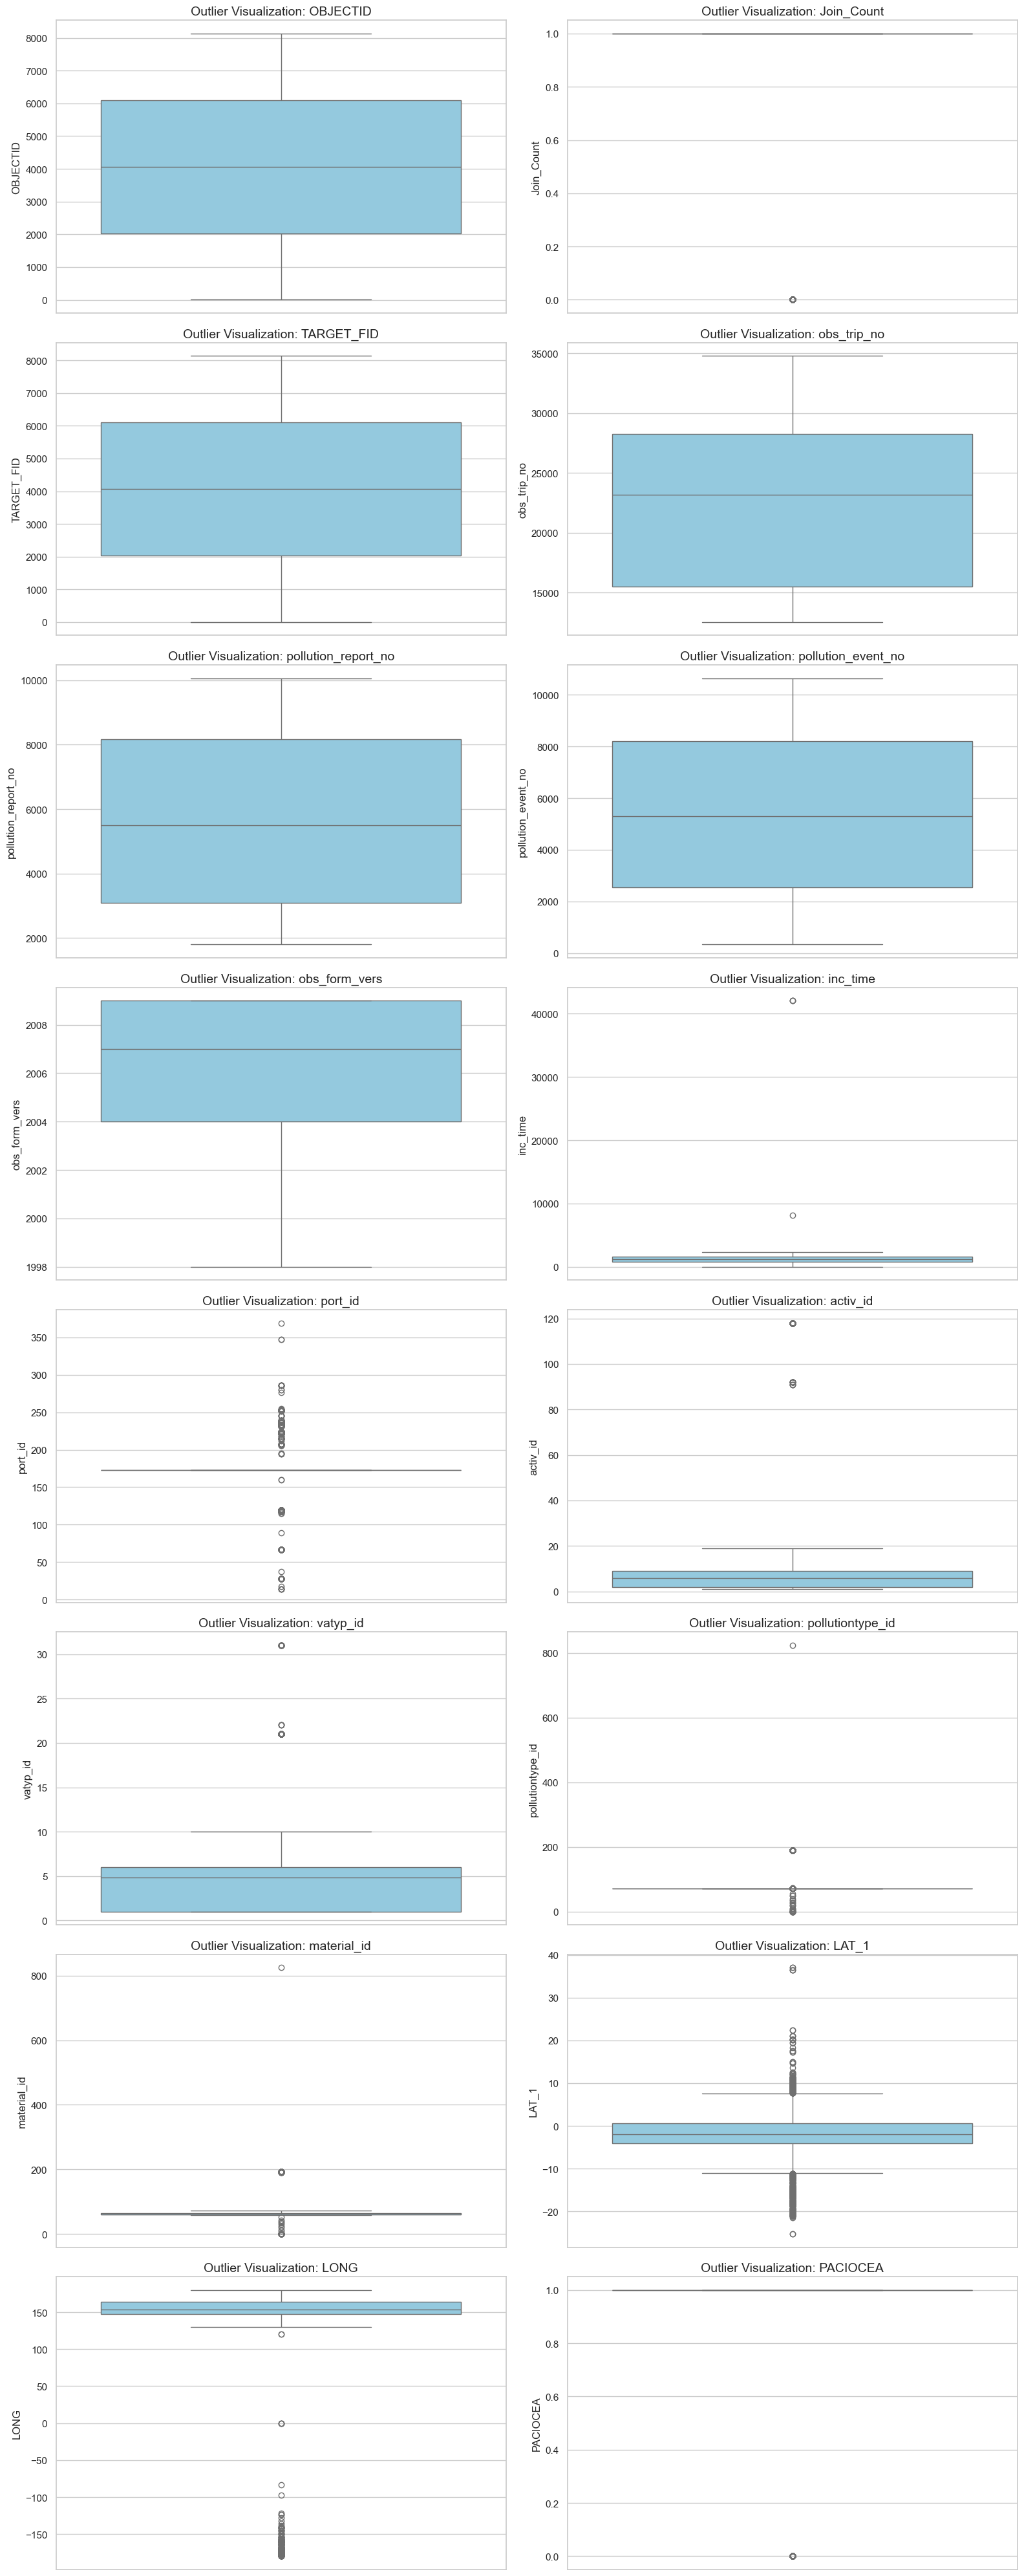

In [17]:
# Identify numeric features
numeric_features = Data_Frame.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Define the target column
target_col = 'pollution_type'

# Remove target column if it is in numeric features
if target_col in numeric_features:
    numeric_features.remove(target_col)

# Check if there are numeric features to plot
if not numeric_features:
    print("No numeric features found in the DataFrame to plot boxplots.")
else:
    # Set up seaborn style
    sns.set(style="whitegrid")

    # Set up the grid of subplots
    n_cols = 2
    n_rows = (len(numeric_features) + 1) // n_cols
    fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(16, 5 * n_rows))
    axes = axes.flatten()

    # Plot boxplots to visualize outliers for numeric features
    for i, feature in enumerate(numeric_features):
        sns.boxplot(y=Data_Frame[feature], ax=axes[i], color="skyblue")
        axes[i].set_title(f'Outlier Visualization: {feature}', fontsize=14)

    # Remove extra subplots
    for j in range(len(numeric_features), len(axes)):
        fig.delaxes(axes[j])


    plt.tight_layout()
    plt.show()

In [22]:
def clip_outliers_iqr(data, features):
    Cleaned_DF = data.copy()
    for feature in features:
        Q1 = Cleaned_DF[feature].quantile(0.25)
        Q3 = Cleaned_DF[feature].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Clip values outside the bounds
        Cleaned_DF[feature] = Cleaned_DF[feature].clip(lower=lower_bound, upper=upper_bound)
    return Cleaned_DF

# Apply the function
feature_cols = Data_Frame.select_dtypes(include=['int64', 'float64']).columns.tolist()
df_no_outliers = clip_outliers_iqr(Data_Frame, feature_cols)

# Show before and after shapes (shape will remain the same as rows are not removed)
print("Original dataset shape:", Data_Frame.shape)
print("After outlier clipping shape:", df_no_outliers.shape)

# Display the first few rows of the dataframe after clipping
display(df_no_outliers.head())

Original dataset shape: (8133, 43)
After outlier clipping shape: (8133, 43)


,OBJECTID,Join_Count,TARGET_FID,obs_trip_no,pollution_report_no,pollution_event_no,obs_form_vers,inc_date,inc_time,inc_dtime,...,Note9,Note10,Note11,LAT_1,LONG,EEZ_Local,Country,ISO_3digit,PACIOCEA,Country_encoded
0,1,1,1,12517,1802,338,2007,40212,500,40212.208333,...,OIL PUMPED OUT. DARK RAINBOW COLOURS AND GET T...,REDDISH BROWN- BLUE - AND GREEN,TRAIL EST . 7 NM 275┬░ T . EST. 100 LITRES,-0.426850,146.4896,EEZ,Papua New Guinea,PNG,1,16
1,2,1,2,12520,1803,339,2007,20/04/2010 0:00,2300,20/04/2010 23:00,...,OIL PUMPED OUT. DARK RAINBOW COLOURS AND GET T...,REDDISH BROWN- BLUE - AND GREEN,TRAIL EST . 7 NM 275┬░ T . EST. 100 LITRES,-1.658100,152.6769,EEZ,Papua New Guinea,PNG,1,16
2,3,1,3,12521,1805,341,2007,27/05/2010 0:00,1242,27/05/2010 12:42,...,OIL PUMPED OUT. DARK RAINBOW COLOURS AND GET T...,REDDISH BROWN- BLUE - AND GREEN,TRAIL EST . 7 NM 275┬░ T . EST. 100 LITRES,7.646708,143.4865,EEZ,Micronesia,FSM,1,12
3,4,1,4,12521,1806,342,2007,27/05/2010 0:00,1242,27/05/2010 12:42,...,OIL PUMPED OUT. DARK RAINBOW COLOURS AND GET T...,REDDISH BROWN- BLUE - AND GREEN,TRAIL EST . 7 NM 275┬░ T . EST. 100 LITRES,7.646708,143.4865,EEZ,Micronesia,FSM,1,12
4,5,1,5,12521,1807,343,2007,40184,1306,40184.545833,...,OIL PUMPED OUT. DARK RAINBOW COLOURS AND GET T...,REDDISH BROWN- BLUE - AND GREEN,TRAIL EST . 7 NM 275┬░ T . EST. 100 LITRES,4.837083,143.7593,EEZ,Micronesia,FSM,1,12


In [16]:
df_no_outliers.to_csv("df_no_outliers.csv", index=False)

NameError: name 'df_no_outliers' is not defined

# **Encoding the Categorical Values**

In [19]:
# Creating a LabelEncoder instance
lab_enc = LabelEncoder()

# Apply label encoding to the 'Country' column, handling potential NaNs
# Using .loc to avoid SettingWithCopyWarning
Data_Frame.loc[:, 'Country_encoded'] = lab_enc.fit_transform(Data_Frame['Country'].fillna('Unknown'))

# View the mapping of labels to numbers
label_mapping = dict(zip(lab_enc.classes_, lab_enc.transform(lab_enc.classes_)))
print("Label Mapping for 'Country':")
for k, v in label_mapping.items():
    print(f"{k}: {v}")

# Display the DataFrame with the new encoded column
display(Data_Frame.head())

Label Mapping for 'Country':
American Samoa: 0
Australia: 1
Cook Islands: 2
Ecuador: 3
Fiji: 4
French Polynesia: 5
International Waters: 6
Japan: 7
Jarvis Island: 8
Kiribati: 9
Line Group: 10
Marshall Islands: 11
Micronesia: 12
Nauru: 13
Northern Mariana Islands and Guam: 14
Palau: 15
Papua New Guinea: 16
Phoenix Group: 17
Samoa: 18
Solomon Islands: 19
Taiwan: 20
Tokelau: 21
Tonga: 22
Tuvalu: 23
Vanuatu: 24


,OBJECTID,Join_Count,TARGET_FID,obs_trip_no,pollution_report_no,pollution_event_no,obs_form_vers,inc_date,inc_time,inc_dtime,...,Note9,Note10,Note11,LAT_1,LONG,EEZ_Local,Country,ISO_3digit,PACIOCEA,Country_encoded
0,1,1,1,12517,1802,338,2007,40212,500,40212.208333,...,OIL PUMPED OUT. DARK RAINBOW COLOURS AND GET T...,REDDISH BROWN- BLUE - AND GREEN,TRAIL EST . 7 NM 275┬░ T . EST. 100 LITRES,-0.426850,146.4896,EEZ,Papua New Guinea,PNG,1,16
1,2,1,2,12520,1803,339,2007,20/04/2010 0:00,2300,20/04/2010 23:00,...,OIL PUMPED OUT. DARK RAINBOW COLOURS AND GET T...,REDDISH BROWN- BLUE - AND GREEN,TRAIL EST . 7 NM 275┬░ T . EST. 100 LITRES,-1.658100,152.6769,EEZ,Papua New Guinea,PNG,1,16
2,3,1,3,12521,1805,341,2007,27/05/2010 0:00,1242,27/05/2010 12:42,...,OIL PUMPED OUT. DARK RAINBOW COLOURS AND GET T...,REDDISH BROWN- BLUE - AND GREEN,TRAIL EST . 7 NM 275┬░ T . EST. 100 LITRES,9.369533,143.4865,EEZ,Micronesia,FSM,1,12
3,4,1,4,12521,1806,342,2007,27/05/2010 0:00,1242,27/05/2010 12:42,...,OIL PUMPED OUT. DARK RAINBOW COLOURS AND GET T...,REDDISH BROWN- BLUE - AND GREEN,TRAIL EST . 7 NM 275┬░ T . EST. 100 LITRES,9.369533,143.4865,EEZ,Micronesia,FSM,1,12
4,5,1,5,12521,1807,343,2007,40184,1306,40184.545833,...,OIL PUMPED OUT. DARK RAINBOW COLOURS AND GET T...,REDDISH BROWN- BLUE - AND GREEN,TRAIL EST . 7 NM 275┬░ T . EST. 100 LITRES,4.837083,143.7593,EEZ,Micronesia,FSM,1,12


# **Feature Selection and Feature Scaling**

In [25]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Separate features and labels
if not df_no_outliers.empty:
    # Define features (X) and target (y)
    # Exclude the original 'Country' and 'pollution_type' columns as we will use the encoded versions
    # Also exclude identifier columns and note columns that are not relevant for modeling
    X = df_no_outliers.drop(columns=['OBJECTID', 'TARGET_FID', 'inc_date', 'inc_time', 'inc_dtime',
                                     'port_id', 'eez_code', 'eez_subcode', 'ISO_3digit', 'EEZ_Local',
                                     'Country', 'pollutiontype_id', 'material_id', 'pollution_desc',
                                     'Note1', 'Note2', 'Note3', 'Note4', 'Note5', 'Note6', 'Note7',
                                     'Note8', 'Note9', 'Note10', 'Note11', 'pollution_type'])
    y = df_no_outliers['pollution_type']

    # Identify categorical columns in X
    categorical_cols = X.select_dtypes(include='object').columns

    # Apply Label Encoding to categorical columns in X
    for col in categorical_cols:
        # Handle potential NaNs during encoding by filling with a placeholder
        X[col] = LabelEncoder().fit_transform(X[col].fillna('Unknown'))

    # Initialize the scaler
    scaler = StandardScaler()

    # Fit the scaler on the features
    scaler.fit(X)

    # Optional: convert scaled features back to DataFrame for readability - this is not needed for model training
    # X_scaled = scaler.transform(X)
    # X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

    # Show sample of original features before scaling for context
    print("Features after encoding (first 5 rows):")
    display(X.head())

    print("\nScaler fitted successfully.")

else:
    print("The DataFrame df_no_outliers is empty. Cannot separate features and labels or apply scaling.")

Features after encoding (first 5 rows):


,Join_Count,obs_trip_no,pollution_report_no,pollution_event_no,obs_form_vers,activ_id,vatyp_id,stickers_ans,aware_ans,advised_ans,location_other,material,pollution_qty,LAT_1,LONG,PACIOCEA,Country_encoded
0,1,12517,1802,338,2007,15.000000,1.000000,0,1,2,147,25,1535,-0.426850,146.4896,1,16
1,1,12520,1803,339,2007,15.000000,1.000000,1,1,0,147,30,3531,-1.658100,152.6769,1,16
2,1,12521,1805,341,2007,7.765257,4.839087,1,1,0,147,28,506,7.646708,143.4865,1,12
3,1,12521,1806,342,2007,3.000000,1.000000,1,1,0,147,28,505,7.646708,143.4865,1,12
4,1,12521,1807,343,2007,8.000000,1.000000,1,1,0,147,28,505,4.837083,143.7593,1,12



Scaler fitted successfully.


# **Saving the Scaler file as .pkl**

In [26]:
joblib.dump(scaler, 'Scaler.pkl')

['Scaler.pkl']


# **Data Splitting and applying Standard Scaler**

In [27]:
# Let's split the data before applying the Scaler
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# applying standard scaler to the split data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# **Model Selection and Model Building**

In [28]:
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm_model.fit(X_train_scaled, y_train)

SVC(random_state=42)

# **Making Prediction with Test Data**

In [29]:
y_pred = svm_model.predict(X_test_scaled)
y_pred

array(['Waste dumped overboard', 'Oil splillages and leakages',
       'Waste dumped overboard', ..., 'Waste dumped overboard',
       'Waste dumped overboard', 'Waste dumped overboard'], dtype=object)

# **Applying Evaluation Metrics to validate model's performance**

In [30]:
print("🔍 Accuracy:", accuracy_score(y_test, y_pred))
print("\n📋 Classification Report:\n", classification_report(y_test, y_pred))

🔍 Accuracy: 0.8137676705593117

📋 Classification Report:
                                 precision    recall  f1-score   support

                            11       0.00      0.00      0.00         1
                            71       0.50      1.00      0.67         1
                            72       0.00      0.00      0.00         1
Abandoned or Lost Fishing Gear       0.97      0.90      0.94        41
   Oil splillages and leakages       0.58      0.05      0.09       297
                            PG       0.00      0.00      0.00         3
        Waste dumped overboard       0.81      0.99      0.89      1283

                      accuracy                           0.81      1627
                     macro avg       0.41      0.42      0.37      1627
                  weighted avg       0.77      0.81      0.74      1627



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


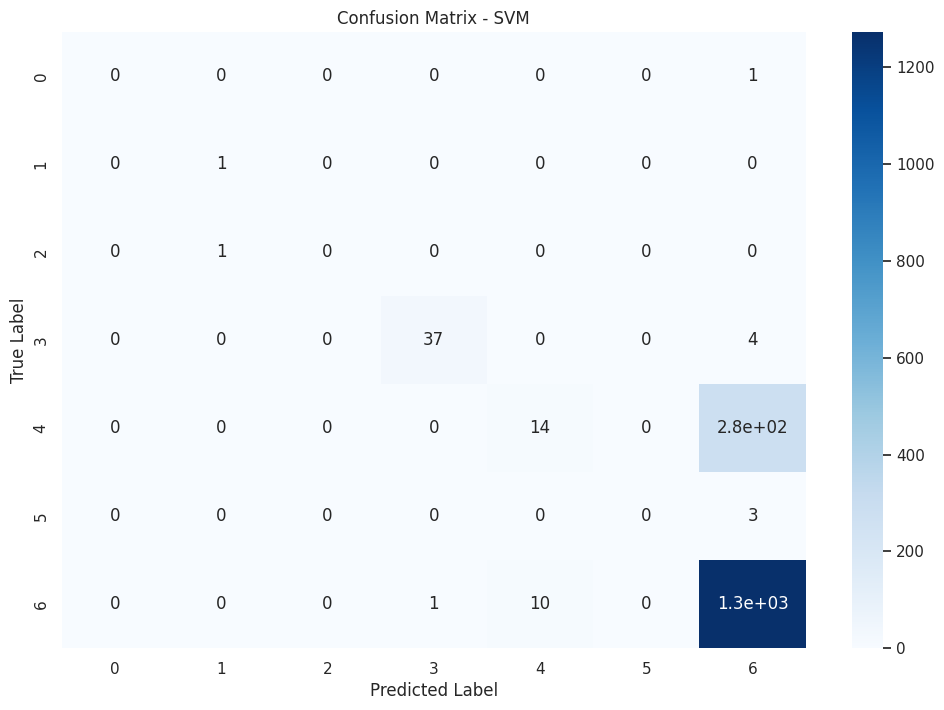

In [31]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 8))
sns.heatmap(cm, cmap='Blues', annot=True)
plt.title("Confusion Matrix - SVM")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# **Saving the Model using Joblib**

In [32]:

joblib.dump(svm_model, '/content/ENV_Marine_Pollution_Obs_data_v4.xlsx')

['/content/ENV_Marine_Pollution_Obs_data_v4.xlsx']

In [ ]:
from google.colab import drive
drive.mount('/content/drive')